# Pole figure notebook example


In [ ]:
from matplotlib.colors import LogNorm
import numpy as np

import cdiutils

cdiutils.plot.update_plot_params()

Path to the data that contains the orhtogonalised Bragg peak, along with the corresponding grid of q values.

If you have run the `BcdiPipeline.preprocess()` function, you can find the data in the results folder, in the `"S<scan>_preprocessed_data.cxi"` file.

In [ ]:
path = ("path/to/data.cxi")

Load and plot the data

(141,) (146,) (146,) (141, 146, 146)


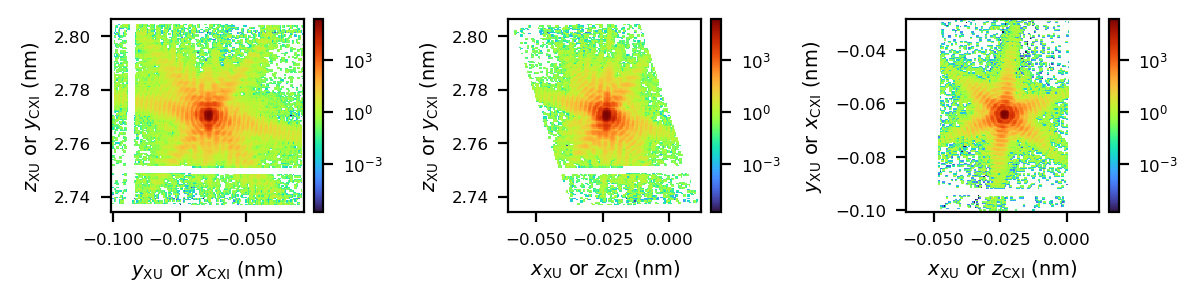

In [3]:
with cdiutils.CXIFile(path, "r") as cxi:
    data = cxi["entry_1/data_2/data"]
    qx = cxi["entry_1/result_2/qx_xu"]
    qy = cxi["entry_1/result_2/qy_xu"]
    qz = cxi["entry_1/result_2/qz_xu"]
    shift = cxi["entry_1/result_2/q_space_shift"]

print(qx.shape, qy.shape, qz.shape, data.shape)
voxel_size = (
    np.diff(qx).mean(),
    np.diff(qy).mean(),
    np.diff(qz).mean()
)

fig, axes = cdiutils.plot.plot_volume_slices(
    data, voxel_size=voxel_size, data_centre=shift,
    norm=LogNorm(), convention="xu", show=False
)

cdiutils.plot.add_labels(axes, convention="xu")
fig

### Usage of `cdiutils.analysis.pole_figure`

The `cdiutils.analysis.pole_figure` function generates a crystallographic pole figure using stereographic projection. This method maps 3D diffraction intensity data onto a 2D plane, providing a visual representation of the crystallographic orientation distribution.

#### Parameters:
- **intensity (np.ndarray)**: A 3D array of intensity values representing the diffraction data.
- **grid (list)**: A list of 1D arrays defining the orthogonal grid (e.g., `[x_coords, y_coords, z_coords]`).
- **axis (str, optional)**: Specifies the projection axis and hemisphere:
  - `"0"`, `"1"`, `"2"`: Upper hemisphere projection onto the equatorial plane.
  - `"-0"`, `"-1"`, `"-2"`: Lower hemisphere projection onto the equatorial plane.
  - The absolute value of the axis determines the normal plane:
    - `|axis|=0`: Project onto the yz-plane (normal to x-axis).
    - `|axis|=1`: Project onto the xz-plane (normal to y-axis).
    - `|axis|=2`: Project onto the xy-plane (normal to z-axis).
  - Defaults to `"2"` (upper hemisphere projection onto the xy-plane).
- **radius (float, optional)**: Radius of the spherical shell for data selection. Defaults to `None` (0.25 * max radial distance).
- **dr (float, optional)**: Thickness of the spherical shell. Defaults to `None` (0.01 * radius).
- **resolution (int, optional)**: Resolution of the output 2D grid (number of points per dimension). Defaults to `250`.
- **figsize (tuple, optional)**: Size of the output figure. Defaults to `(4, 4)`.
- **title (str, optional)**: Title for the plot. Defaults to `None`.
- **verbose (bool, optional)**: If `True`, prints and plots additional information. Defaults to `False`.
- **save (str, optional)**: File path to save the plot. Defaults to `None`.
- **plot_params (dict, optional)**: Additional parameters for the plotting function.

#### Returns:
- **tuple**: 
  - `(grid_x, grid_y, projected_intensity)`: The 2D grid coordinates and intensity values.
  - `(fig, ax)`: The figure and axis objects for the plot.


Projection axis: 2, selecting upper hemisphere with observer at South Pole
Selected radius: 0.020 and spherical shell thickness: 0.00020


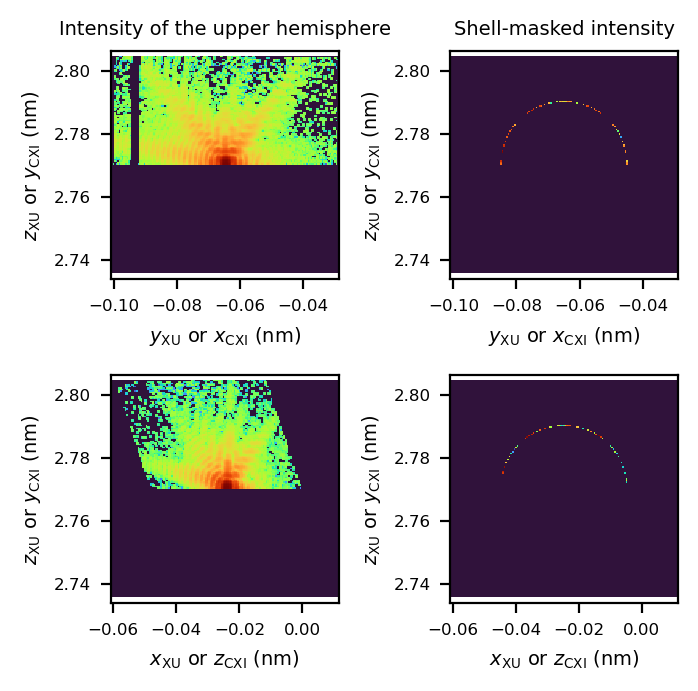

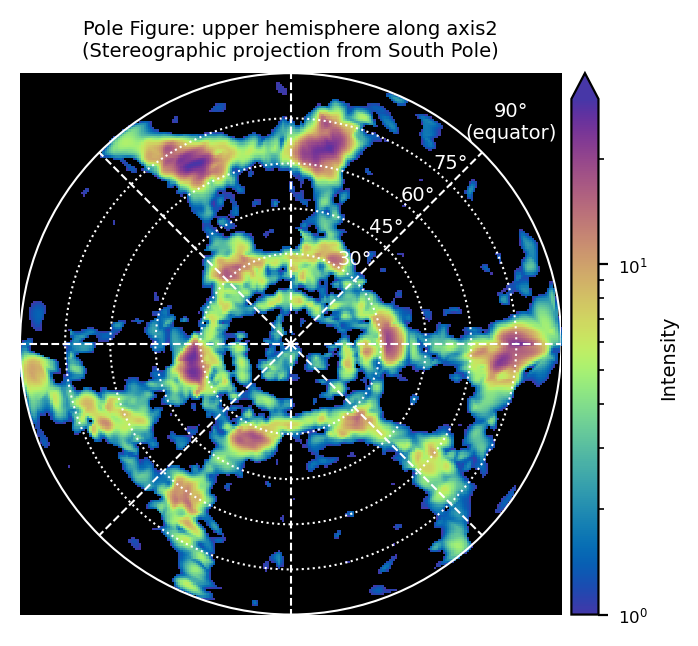

In [ ]:
# Basic usage with default parameters
(grid_x, grid_y, projected_int), (fig, ax) = cdiutils.analysis.pole_figure(
    data,
    [qx, qy, qz],
    radius=0.020,
    dr=0.0002, 
    axis="2",
    norm=LogNorm(1, ),
    verbose=True,
)
